# Working with data in Jupyter notebooks

### Predictive modelling with machine learning

#### Lecturer: Vegard H. Larsen

## Introduction 

### What we will cover in this notebook:
1. Setting up the environment
2. Reading and Writing Data with Pandas
3. Exploring and Visualizing Data
4. Handling Missing Values and Outliers
5. Encoding Categorical Variables
6. Feature Scaling and Normalization
7. Train-Test Split and Basic Data Pipelines
8. Introduction to PyTorch Tensors

## 2. Setting up the environment

Using a virtual environment or a conda environment is crucial for ensuring reproducibility, consistency, and maintainability in your projects. Without an isolated environment, library installations and updates can affect your system-wide settings or other projects, leading to version conflicts and unpredictable behavior. By creating a dedicated environment for each project, you can precisely control which versions of Python and its packages are used, making it easier to replicate your results, share your work with others, and quickly recover a working setup if something goes wrong. This practice streamlines collaboration, simplifies troubleshooting, and ultimately helps maintain the integrity and reliability of your codebase.

- The core libraries we will be using in this course are:
    - pandas for data manipulation and exploration.
        - [Docs](https://pandas.pydata.org/docs/)
    - scikit-learn for preprocessing and modeling
        - [Docs](https://scikit-learn.org/stable/)
    - matplotlib for basic plotting and data visualization
        - [Docs](https://matplotlib.org/stable/contents.html)
    - seaborn for statistical data visualization
        - [Docs](https://seaborn.pydata.org/)
- Additional libraries that will be used/discussed:
    - PyTorch for deep learning workflows (optional)
        - PyTorch is not a core library, but it is widely used for deep learning tasks. We will only touch on it briefly in this course, but you may want to explore it further if you are interested in deep learning. 
        - [Docs](https://pytorch.org/docs/stable/index.html)

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import sklearn

In [2]:
# Print our the versions of the libraries
print(f'Pandas version: {pd.__version__}')
print(f'Numpy version: {np.__version__}')
print(f'Matplotlib version: {plt.matplotlib.__version__}')
print(f'Seaborn version: {sns.__version__}')
print(f'Scikit-learn version: {pd.__version__}')
print(f'PyTorch version: {torch.__version__}')
print(f'Sklearn version: {sklearn.__version__}')
# Check if GPU is available
print(f'Acess to GPU: {torch.cuda.is_available()}') 

Pandas version: 2.2.2
Numpy version: 1.26.4
Matplotlib version: 3.9.2
Seaborn version: 0.13.2
Scikit-learn version: 2.2.2
PyTorch version: 2.5.1
Sklearn version: 1.6.0
Acess to GPU: True


## 2. Reading and Writing Data with Pandas
- **Read data** from common file formats such as CSV.
- **Write processed data** back to disk in CSV format.
- Use **basic inspection methods** (such as `head()`, `info()`, and `describe()`) to quickly understand the structure and statistical properties of your dataset.

In [3]:
# Reading data
df = pd.read_csv('../data/house-prices/test.csv')  

# Displaying the first 5 rows
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
# .info() method to get a summary of the dataframe 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [5]:
# .describe() method to get a statistical summary of the dataframe

df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [6]:
# Writing data to a csv file

df.to_csv('../data/tmp/processed_housing.csv', index=False)

## 3. Exploring and Visualizing Data
- Basic summary statistics.
- Identifying distributions of features.
- Simple visualizations (histograms, box plots, scatter plots) to understand data distribution, outliers, and relationships between variables.

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000
Note: pairplot can be slow for larger datasets.



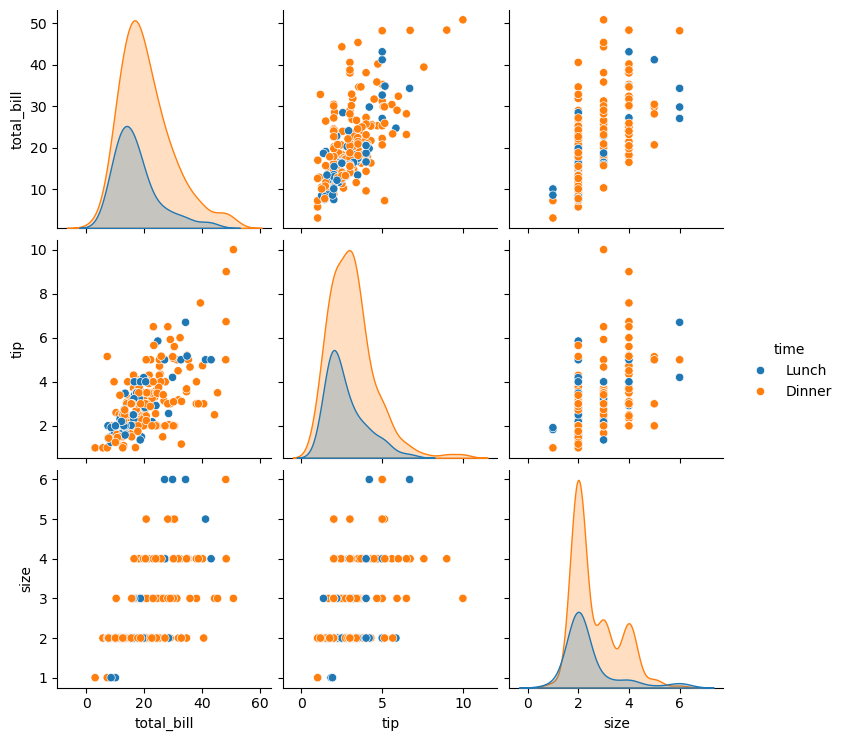

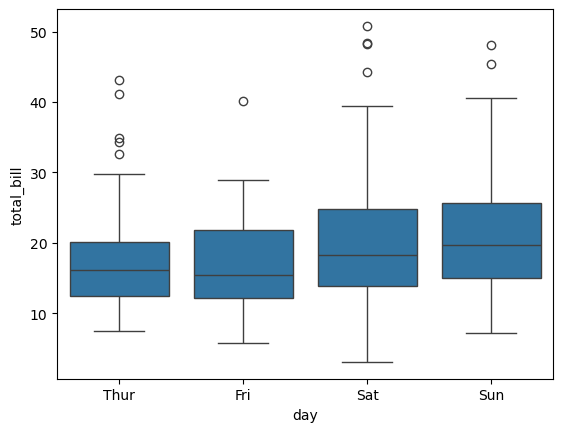

In [7]:
# Load an example dataset
tips = sns.load_dataset('tips')

# Quick summary statistics
print(tips.describe())

# Pairplot to visualize relationships
print("Note: pairplot can be slow for larger datasets.\n")

sns.pairplot(tips, hue='time')
plt.show()

# Let's also do a boxplot for 'total_bill' grouped by 'day'\n",
sns.boxplot(x='day', y='total_bill', data=tips)
plt.show()

## 4. Handling Missing Values and Outliers
- Techniques for detecting missing values (`isnull().sum()`) and outliers (using IQR or $z$-score).
- Strategies for handling missing data (drop vs. impute).
- Using `sklearn.impute.SimpleImputer` for numerical and categorical data.
- Discussion of domain knowledge in deciding how to handle anomalies.

In [8]:
from sklearn.datasets import load_diabetes

# Load the diabetes dataset as a DataFrame
data = load_diabetes(as_frame=True)
df_missing = data.frame

# Artificially introduce some missing values\n",
df_missing.iloc[:10, 2] = np.nan  # Suppose the 3rd column has missing for first 10 rows
  
# Detect missing values
print("Missing values per column:\n", df_missing.isnull().sum())

# Simple strategy: fill numerical missing values with the mean
df_missing.fillna(df_missing.mean(), inplace=True)

# Detect outliers in 'bmi' column using IQR
Q1 = df_missing['bmi'].quantile(0.25)
Q3 = df_missing['bmi'].quantile(0.75)
IQR = Q3 - Q1
outliers = df_missing[(df_missing['bmi'] < Q1 - 1.5 * IQR) | (df_missing['bmi'] > Q3 + 1.5 * IQR)]
print(f"Number of outliers in 'bmi': {len(outliers)}")

Missing values per column:
 age        0
sex        0
bmi       10
bp         0
s1         0
s2         0
s3         0
s4         0
s5         0
s6         0
target     0
dtype: int64
Number of outliers in 'bmi': 5


## 5. Encoding Categorical Variables
- Importance of converting string labels into numeric form for modeling.
- One-hot encoding with `pd.get_dummies()` or `sklearn.preprocessing.OneHotEncoder`.
- Label encoding vs. one-hot encoding and when to use each.

In [9]:
import seaborn as sns

# Load the 'tips' dataset, which has some categorical features
tips = sns.load_dataset('tips')
print("Data types before encoding:\n", tips.dtypes)
print("\nData before encoding:\n", tips.head())

# One-hot encoding on categorical columns
encoded_tips = pd.get_dummies(tips, columns=['day','sex','smoker','time'], drop_first=True)

print("\nData after one-hot encoding:\n", encoded_tips.head())

Data types before encoding:
 total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

Data before encoding:
    total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

Data after one-hot encoding:
    total_bill   tip  size  day_Fri  day_Sat  day_Sun  sex_Female  smoker_No  \
0       16.99  1.01     2    False    False     True        True       True   
1       10.34  1.66     3    False    False     True       False       True   
2       21.01  3.50     3    False    False     True       False       True   
3       23.68  3.31     2    False    False     True       False       True   
4       24.59  3.61   

## 6. Feature Scaling and Normalization
- Show `StandardScaler` and `MinMaxScaler` from `scikit-learn`.
- Discuss when scaling is necessary (e.g., for neural networks or distance-based models).

In [10]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load the Iris dataset as a DataFrame
iris = load_iris(as_frame=True)
df_iris = iris.data.copy()

# Standard scaling
scaler = StandardScaler()
df_standard_scaled = scaler.fit_transform(df_iris)
 
# Min-Max scaling
minmax = MinMaxScaler()
df_minmax_scaled = minmax.fit_transform(df_iris)

print("Original (first 5 rows):\n", df_iris.head(), "\n")
print("Standard Scaled (first 5 rows):\n", df_standard_scaled[:5], "\n")
print("Min-Max Scaled (first 5 rows):\n", df_minmax_scaled[:5])

Original (first 5 rows):
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2 

Standard Scaled (first 5 rows):
 [[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]] 

Min-Max Scaled (first 5 rows):
 [[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.1

The difference between `.fit_transform()`, `.fit()`, and `.transform()`:
1.	`.fit()`:
    - Calculates the parameters required for transformation based on the input data.
    - Does not return transformed data.
    - Example: In `StandardScaler`, `.fit()` calculates the mean and standard deviation.
2.	`.transform()`:
    - Applies the transformation to the data using parameters calculated during `.fit()`.
    - Requires that `.fit()` has been called earlier (either directly or implicitly).
    - Example: In `StandardScaler`, `.transform()` scales the data using the precomputed mean and standard deviation.
3.	`.fit_transform()`:
    - Combines `.fit()` and `.transform()` in one step.
    - Useful when you need to fit and transform the same dataset in a single line.
    - Example: In `StandardScaler`, `.fit_transform()` computes the mean and standard deviation (fit) and then scales the data (transform).

## 7. Train-Test Split and Basic Data Pipelines
- Introduce the concept of splitting data into training and test sets.
- Show `train_test_split` usage from `scikit-learn`.
- Introduce basic pipeline concepts (`sklearn.pipeline.Pipeline`) to ensure consistent preprocessing and modeling steps.

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Load iris dataset for demonstration
iris = load_iris(as_frame=True)
X = iris.data
y = iris.target

# Split data into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a simple pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Evaluate
score = pipeline.score(X_test, y_test)
print(f"Pipeline test accuracy: {score:.2f}")

Pipeline test accuracy: 1.00


## 8. Introduction to PyTorch Tensors
- Briefly show how PyTorch tensors differ from NumPy arrays and how to convert between them.
- This will be relevant for deep learning sessions later in the course.

In [12]:
# Create a simple NumPy array
np_array = np.array([[1, 2], [3, 4]])
print("NumPy Array:")
print(np_array)

# Convert NumPy array to PyTorch tensor
torch_tensor = torch.tensor(np_array)
print("\nPyTorch Tensor:")
print(torch_tensor)

# Perform operations
# Element-wise addition
np_result = np_array + 2
torch_result = torch_tensor + 2

print("\nNumPy Array after adding 2:")
print(np_result)

print("\nPyTorch Tensor after adding 2:")
print(torch_result)

# Key differences:
# 1. NumPy arrays are part of the NumPy library and are used for general-purpose numerical computations.
# 2. PyTorch tensors are similar to NumPy arrays but support GPU acceleration and are optimized for deep learning.

# Example: Moving a PyTorch tensor to a GPU (if available)
if torch.cuda.is_available():
    torch_tensor_gpu = torch_tensor.to('cuda')
    print("\nPyTorch Tensor moved to GPU:")
    print(torch_tensor_gpu)
else:
    print("\nGPU is not available, tensor remains on CPU.")

NumPy Array:
[[1 2]
 [3 4]]

PyTorch Tensor:
tensor([[1, 2],
        [3, 4]])

NumPy Array after adding 2:
[[3 4]
 [5 6]]

PyTorch Tensor after adding 2:
tensor([[3, 4],
        [5, 6]])

PyTorch Tensor moved to GPU:
tensor([[1, 2],
        [3, 4]], device='cuda:0')
